# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

### 1

Let's denote $(AXB)_k$ the $k^{th}$ column of $AXB$.

$(AXB)_k = A(XB)_k = A \begin{bmatrix}
x_{11}b_{1k} + \dots + x_{1p}b_{pk} \\
\vdots \\
x_{n1}b_{1k} + \dots + x_{np}b_{pk}\\
\end{bmatrix}$
$= A \begin{bmatrix}
\begin{bmatrix} x_{11} \\ \vdots \\ x_{n1}\end{bmatrix} b_{1k} + \dots + 
\begin{bmatrix} x_{1p} \\ \vdots \\ x_{np}\end{bmatrix} b_{pk} 
\end{bmatrix}$
$= b_{1k}A\begin{bmatrix} x_{11} \\ \vdots \\ x_{n1}\end{bmatrix} + \dots + b_{pk}A\begin{bmatrix} x_{1p} \\ \vdots \\ x_{np}\end{bmatrix}$
$= \begin{bmatrix} b_{1k}A, \dots b_{pk}A\end{bmatrix}\mathrm{vec}(X) = \big(B_k^T \otimes A\big) \mathrm{vec}(X)$ for each column in B.
$\therefore \mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$


For row wise vectorization, Let's consider the transpose of our inner function and keep $vec()$ function the same.
$$\mathrm{vec}\big((AXB)^T\big) = \mathrm{vec}\big(B^TX^TA^T\big)$$ 
repeating the same steps as above, we get: $$\big(A \otimes B^T \big) \mathrm{vec}\big(X^T\big)$$
$\implies$ the equality does not hold for row wise vectorization


### 2

Assuming dimentions of $A$ and $B$ = $n\text{x}n$ and $x$ is a $1\text{-}D$ of $len$ = $n^2$.

To compute $A \otimes B$, we need to multiple each element in $A$ by each element in $B$ to produce an $n^2\text{x}n^2$ matrix. Which reuqires $O(n^4)$ operations in both time and space. Then, each row in the new matrix needs to be multiplied by the $n^2$- elements in vector $x \implies$ $O(n^6)$ for the complete product.

We can use the equality in part 1 to reduce complexity as follows:

replace $x$ in $(A \otimes B)x$  by $\mathrm{vec}(X)$, this takes $O(n^2)$ now using the equality: $(A \otimes B)x = \mathrm{vec}(BXA^T)$ and computing the right hand side which is a simple matrix multiplication with a complexity $O(n^3)$ + $O(n^2)$(reshape) = $O(n^3)$ thus final complexity = $O(n^3)$

### 3

Using properties $(A\otimes B)(C\otimes D)=AC\otimes BD$, and 
 $(A\otimes B)^{-1}=(A^{-1}\otimes B^{-1})$
 
 
 
 $$
(A\otimes I + I \otimes B) = (S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1}) = 
(S_A \otimes I)[\Lambda_A \otimes I + I \otimes S_B\Lambda_B S_B^{-1}] (S_A \otimes I)^{-1} =  (S_A \otimes I)(I \otimes S_B)[\Lambda_A \otimes I + I \otimes \Lambda_B] (I \otimes S_B)^{-1}
(S_A \otimes I)^{-1} = (S_A \otimes S_B) [\Lambda_A \otimes I + I \otimes \Lambda_B] (S_A \otimes S_B)^{-1}$$ this equation is an eigen decomposition of the given entity as clear from its form.


$\Lambda_A \otimes I + I \otimes \Lambda_B = \begin{pmatrix} \lambda_1^A I & \dots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \dots & \lambda_n^A I \end{pmatrix} +  \begin{pmatrix} \Lambda_B & \dots & 0\\ \vdots & \ddots  & \vdots\\ 0 & \dots  & \Lambda_B \end{pmatrix}$ is a diagonal matrix with $\lambda_i^A + \lambda_i^B$, where i goes from 1 to n on the diagonal and they are the eigenvalues.

$\implies$that eigenvectors are the corresponding columns of $S_A \otimes S_B$. 

### 4 

    
 **Richardson iteration with optimal parameter choice:**

$$\tau_{opt} = \frac{2}{\lambda_{max} + \lambda_{min}}$$ for the given matrix we have $$\lambda_{min} = \frac{1}{1000}$$ and $$\lambda_{max} = 1000 \Rightarrow \mathrm{cond}_2(A) = \frac{\lambda_{max}}{\lambda_{min}} = 10^6$$ 

we can calculate number of iterations from this expression: $(1 - \frac{2}{cond_2(A)})^k \leqslant 10^{-4} \Rightarrow k\ln(1- \frac{2}{cond_2(A)}) \leqslant \ln (10^{-4}) \Rightarrow k \geqslant \frac{\ln(10^{-4})}{\ln(1 - \frac{2}{cond_2(A)})} \approx 4605171$.

**Chebyshev iteration (use $2$-norm):**<br/>
$$ e_{k+1} = p(A) e_0, e_{k+1} \leq Cq^k e_0 \rightarrow Cq^k \geq 10^{-4}$$ <br/>
$$\therefore k \geq \frac{-4}{\mbox{log}q}, \, q = \frac{\sqrt{\mbox{cond}(A)} - 1}{\sqrt{\mbox{cond}(A)} + 1} = \frac{999}{1001}$$ Solving, we get:
$$ \boxed{k \geq 4605} $$

**Conjugate gradient method**

As we know , if $A$ has $m$ various eigenvalues, CG converges in $m$ iterations. for our $A$ matrix eigenvalues = $1001$ $\implies$ method requires $1001$ iterations to converge.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

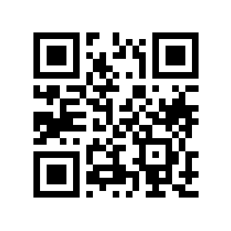

In [2]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [6]:
import numpy as np
import math
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

In [12]:
def compute_T(alpha):
    indices = np.concatenate([np.arange(n), np.arange(1-n, 0)])
    sq_indices = np.meshgrid(indices, indices)
    T = np.zeros([2*n-1, 2*n-1])
    for i in range(2*n-1):
        for j in range(2*n-1):
            T[i, j] = (alpha / math.pi) * np.exp(-alpha*((sq_indices[0][i, j]**2 + sq_indices[1][i, j]**2)))
    print(np.size(T))
    return T

def T_mat_vec(x, alpha):
    A = x.copy()
    n = int(np.sqrt(np.size(A)))
    x_sq = np.reshape(A, (n, n))
    print(np.shape(x_sq))
    x_new = np.pad(x_sq, (n-1, n-1), constant_values=0)[n-1:, n-1:]
    temp = np.fft.ifft2(np.fft.fft2(x_new)*np.fft.fft2(compute_T(alpha)))[:n,:n].reshape(1, -1)[0]
    print(np.size(x_new))
    return temp

(330, 330)
434281
434281


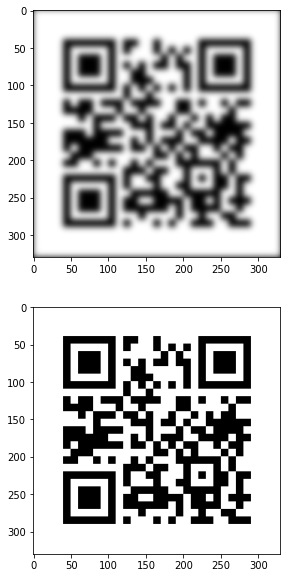

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
x_blur_vec = T_mat_vec(x.reshape(-1), 0.03)
x_blur = x_blur_vec.reshape(x.shape[0], -1)
ax[0].imshow(np.abs(x_blur), cmap="gray")
ax[1].imshow(x, cmap="gray")

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

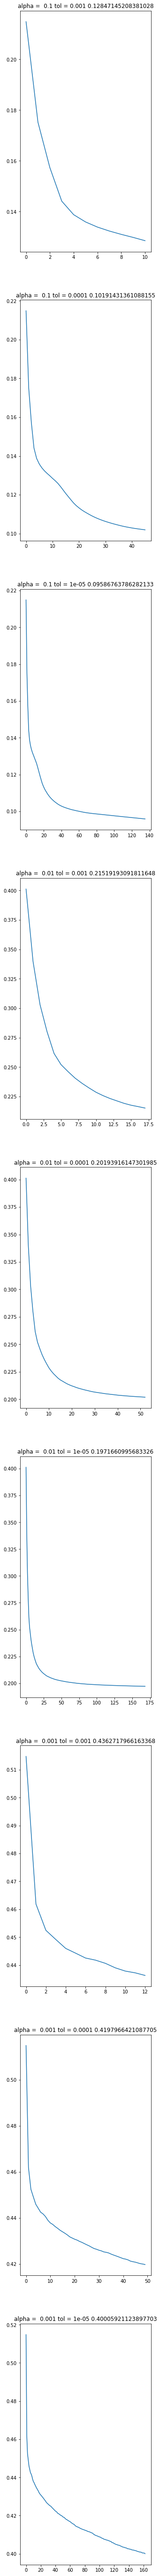

In [50]:
alphas = 10**np.arange(-3., 0)[::-1]
tols = 10**np.arange(-5., -2)[::-1]

plotit = 0
fig, ax = plt.subplots(len(alphas)*len(tols), figsize=(5, 100))

for alpha in alphas:
    for tol in tols:
        norm_x = (x.copy())
        norm_x = norm_x.reshape(-1)
        errors=[]
        def inc_iter(xk):
            global errors
            e = np.linalg.norm(xk - norm_x, ord=2) / np.linalg.norm(norm_x, ord=2)
            errors.append(e)

        n = x.shape[0]
        T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_mat_vec(x, alpha))
        y = T.dot(norm_x)
        x_new, info = spla.cg(T, y, tol=tol, callback=inc_iter)
        ax[plotit].plot(errors)
        num_iters = len(errors)
        ax[plotit].title.set_text(f'alpha =  {alpha} tol = {tol}    {errors[len(errors)-1]}')
        plotit+=1
        

This code was taking too long to execute (so I only plot for $tol$ = $10^{-5}$ to $10^{-3}$) but we can see that it converges to different values for different alphas. It doesn't converge to zero because of inaccuracies due to floating point numbers.

It converges to different values for different alpha's as the T matrix is different and so is the condition number.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [48]:
alpha = .01
n = x.shape[0]
norm_x = x.copy() / 255 #normalising the input 
norm_x = np.reshape(norm_x, (len(norm_x)**2,1))
errors=[]
def inc_iter(xk):
    global errors
    e = np.linalg.norm(xk - norm_x) / np.linalg.norm(norm_x)
    errors.append(e)
norm_x = norm_x.reshape(-1)
T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, .1))
y = T.dot(norm_x) + np.random.normal(0, 1)
x_new, info = spla.cg(T, y, tol=1e-5, maxiter=10, callback=inc_iter)

Resulting error is 0.9584898777804978


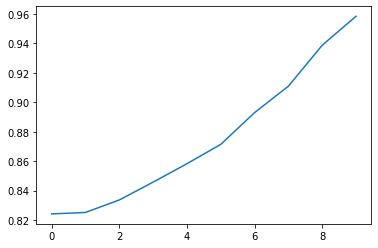

In [49]:
plt.plot(errors)
plt.ylabel("relative error")
print(f"Resulting error is {errors[-1]}")

The left hand side of the equation has been polluted with gaussian noise and so then we try to deconvolve it doesn't approach the origional solution and so the error diverges.

we can some add reguliser to the T matrix and try to come up with some approximate solution, the drawback is that the error will rise via this approach as $x_{approx}$ will go farther from x 

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [41]:
def T_new(alpha, lmbda):
    T = compute_T(alpha)
    T += np.eye(len(T), dtype=float) * lmbda**2

    return T
    # x_new = np.pad(x, (n-1, n-1), constant_values=0)[n-1:, n-1:]
    # x_new = x_new.reshape(-1)
    # T_new = T.reshape(-1)
    # return np.fft.ifft2(np.fft.fft2(x_new)*np.fft.fft2(T_new)).reshape(-1)

In [42]:
def T_mat_vec(x, alpha, lmbda):
    A = x.copy()
    n = int(np.sqrt(np.size(A)))
    x_sq = np.reshape(A, (n, n))
    x_new = np.pad(x_sq, (n-1, n-1), constant_values=0)[n-1:, n-1:]
    temp = np.fft.ifft2(np.fft.fft2(x_new)*np.fft.fft2(T_new(alpha, 0.1)))[:n,:n].reshape(1, -1)[0]
    return temp

In [43]:
lambdas = [10, 1, 0.1]
tols = 10**np.arange(-7., -2)[::-1]

434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281
434281

KeyboardInterrupt: ignored

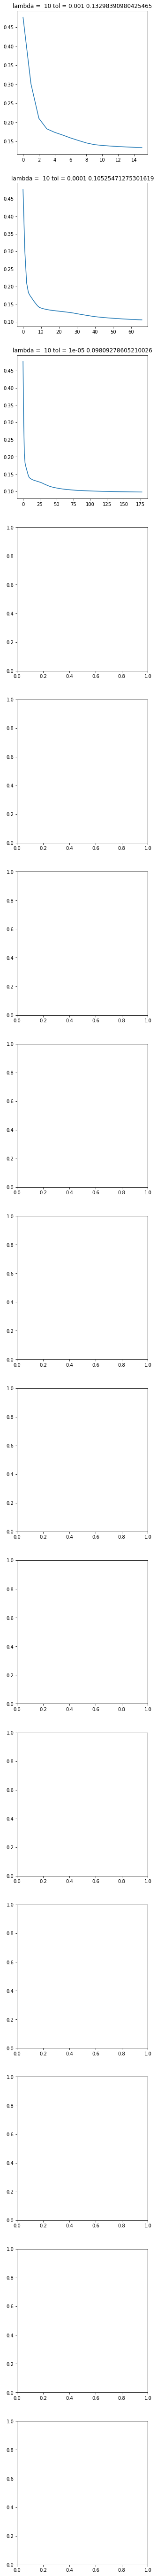

In [45]:
plotit = 0
fig, ax = plt.subplots(len(lambdas)*len(tols), figsize=(5, 100))

for la in lambdas:
    for tol in tols:
        norm_x = (x.copy())
        norm_x = norm_x.reshape(-1)
        errors=[]
        def inc_iter(xk):
            global errors
            e = np.linalg.norm(xk - norm_x, ord=2) / np.linalg.norm(norm_x, ord=2)
            errors.append(e)

        n = x.shape[0]
        T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_mat_vec(x, .1, la))
        y = T.dot(norm_x)
        x_new, info = spla.cg(T, y, tol=tol, callback=inc_iter)
        ax[plotit].plot(errors)
        num_iters = len(errors)
        ax[plotit].title.set_text(f'lambda =  {la} tol = {tol} {errors[len(errors)-1]}')
        plotit+=1

I again faced the same issue of time taken, but the first 3 graphs show that the error converges to the same value which indicates that the regulariser has no affect on the convergence of x. This result is expected because the main problems are floating point values, also it signifies that the condition number for them is low and they are thus all well conditioned  

In [ ]:
# fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
# x_blur_vec = T_mat_vec(x.reshape(-1), 0.03)
# x_blur = x_blur_vec.reshape(x.shape[0], -1)
# ax[0].imshow(np.abs(x_blur), cmap="gray")
# ax[1].imshow(x, cmap="gray")

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here